First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

/tmp/ipython-input-2-2406089636.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2-2406089636.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

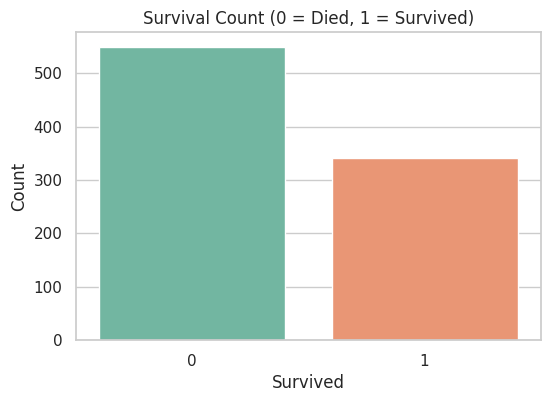

/tmp/ipython-input-2-2406089636.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set1')


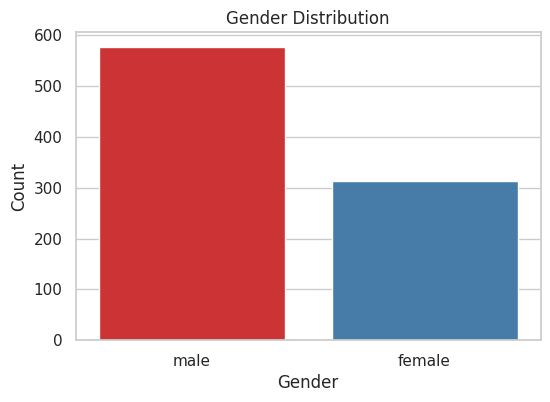

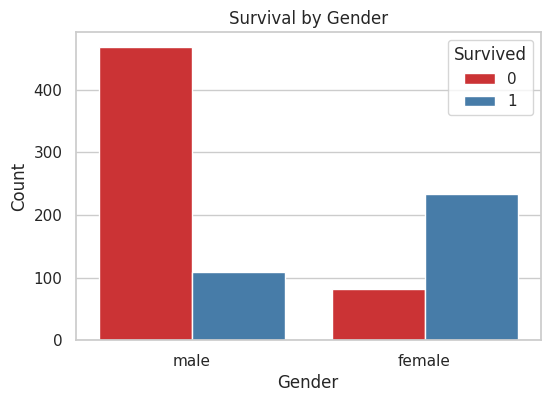

/tmp/ipython-input-2-2406089636.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set3')


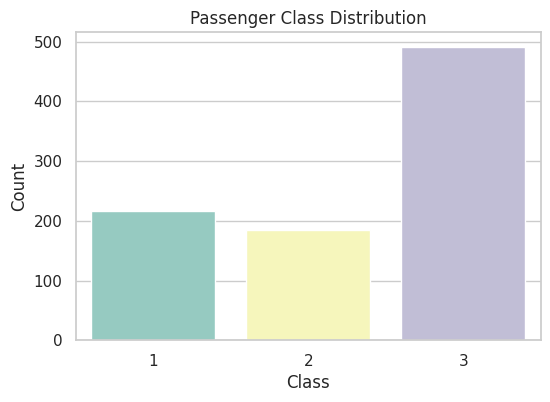

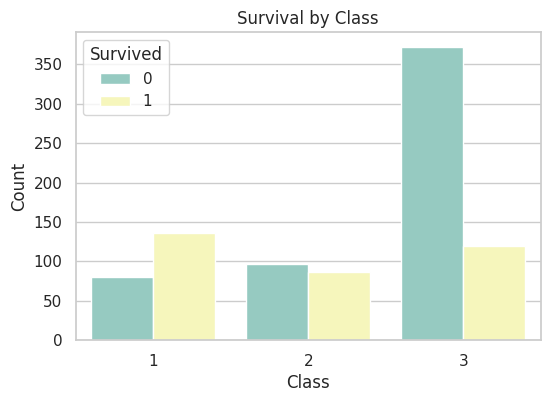

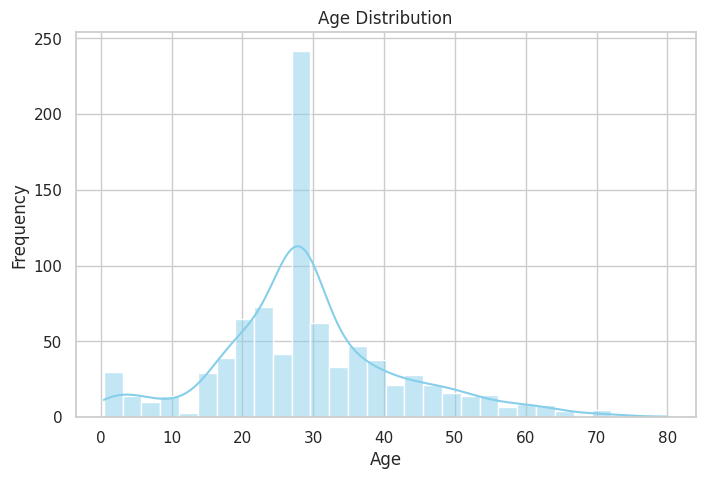

/tmp/ipython-input-2-2406089636.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='coolwarm')


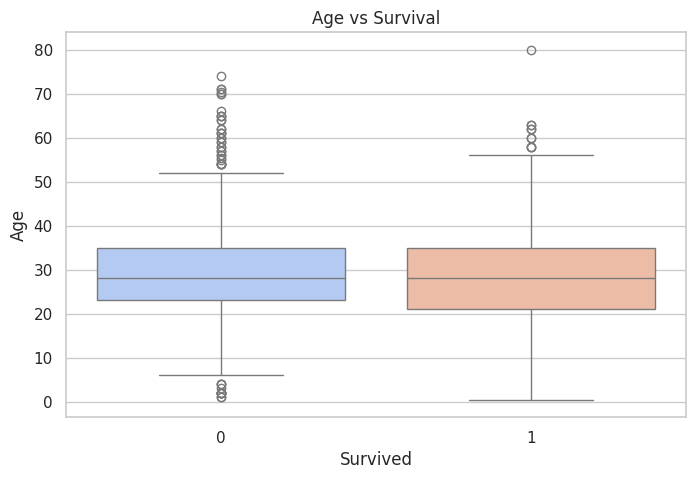

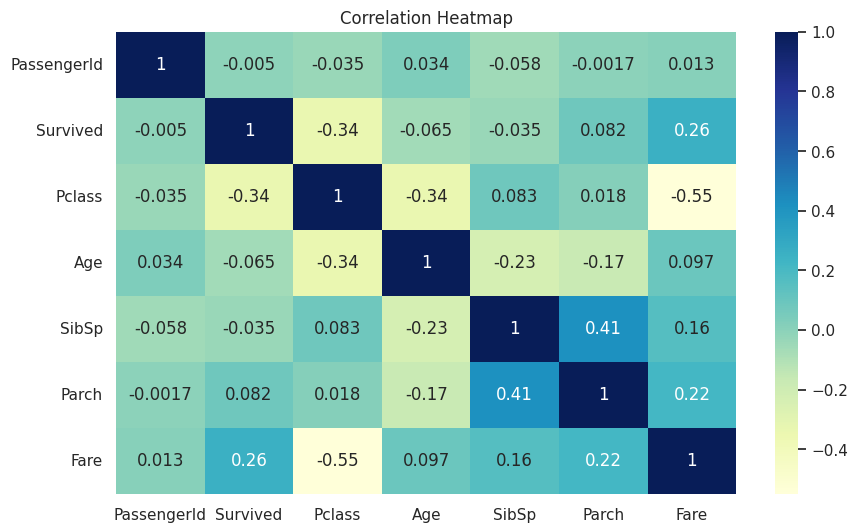

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Fill missing Age with median and Embarked with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to many missing values
df.drop(columns='Cabin', inplace=True)

# Re-check missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# =========================
# Data Visualizations Start
# =========================

# 1. Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# 2. Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette='Set1')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 3. Survival count by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()

# 4. Passenger class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df, palette='Set3')
plt.title("Passenger Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 5. Survival by passenger class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title("Survival by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()

# 6. Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 7. Age vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df, palette='coolwarm')
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

# 8. Correlation heatmap (only numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()
